In [1]:
import pandas as pd
import plotly.express as px
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

/var/folders/8l/f3xq8byx6jx_ykv1p8vljth00000gn/T/ipykernel_56858/2522211868.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.rename(columns={'education.num': 'education_num', 
                   'marital.status': 'marital_status',
                   'capital.gain':'capital_gain',
                   'capital.loss':'capital_loss',
                   'hours.per.week':'hoursperweek',
                   'native.country':'native_country'
                  }, inplace=True)

In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


### Missing Value

In [4]:
df[df == '?'] = np.nan

In [6]:
#data.Age.isnull()
df.isnull().sum()

age                  0
workclass         1376
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1381
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hoursperweek         1
native_country     450
income               1
dtype: int64

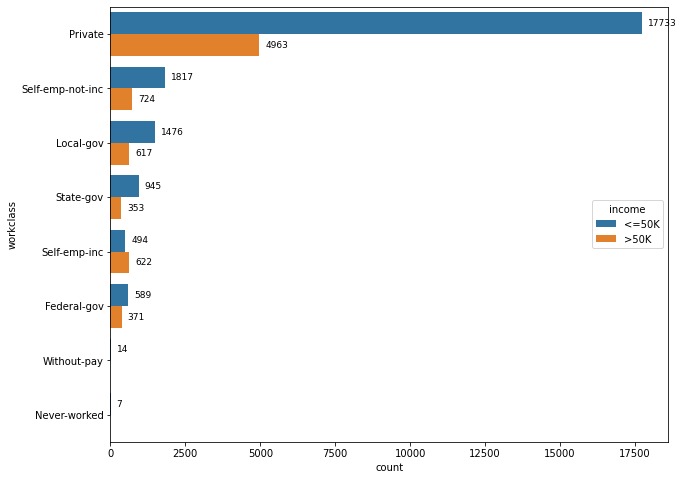

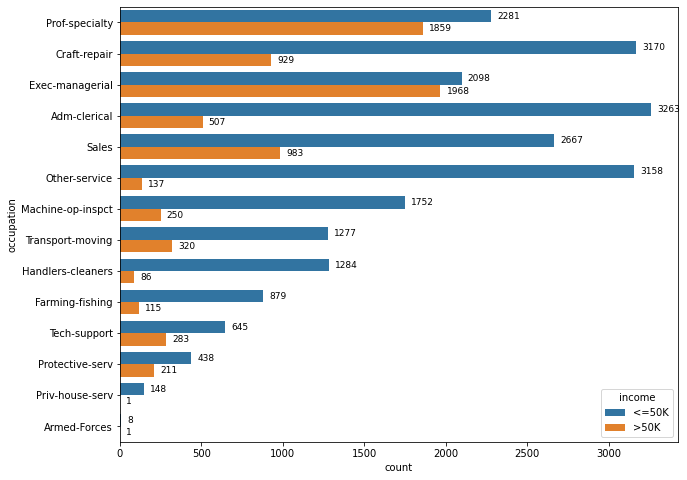

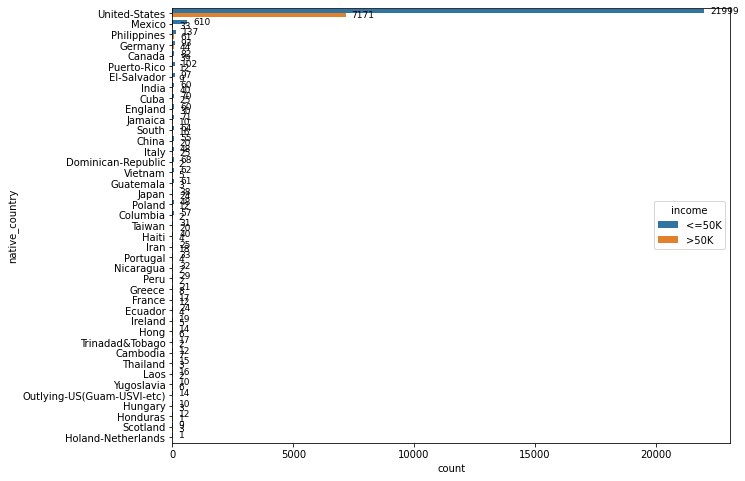

In [ ]:
# let's see how the three variables with missing values look like. Noted that they are all discrete
for miss in ['workclass','occupation','native_country']:
    plt.figure(figsize=(10,8))
    p=sns.countplot(y=df[miss], order=df[miss].value_counts().index,hue=df['income'], data=df)
    for container in p.containers:
        p.bar_label(container,padding=6,size=9,color="black",rotation=0)
   
    plt.show()

the values with missing values are quite random. However, overall missing values are not a lot comparing to total. So we will delete all rows with missing value

In [5]:
df.dropna(inplace=True)

### Feature Engineering

#### Age Group

In [6]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return ">70"

df['age_group'] = df['age'].apply(age_group)
df['age_group'].value_counts()

19-30    8822
31-40    8163
41-50    6710
51-60    3886
61-70    1422
>70      1159
Name: age_group, dtype: int64

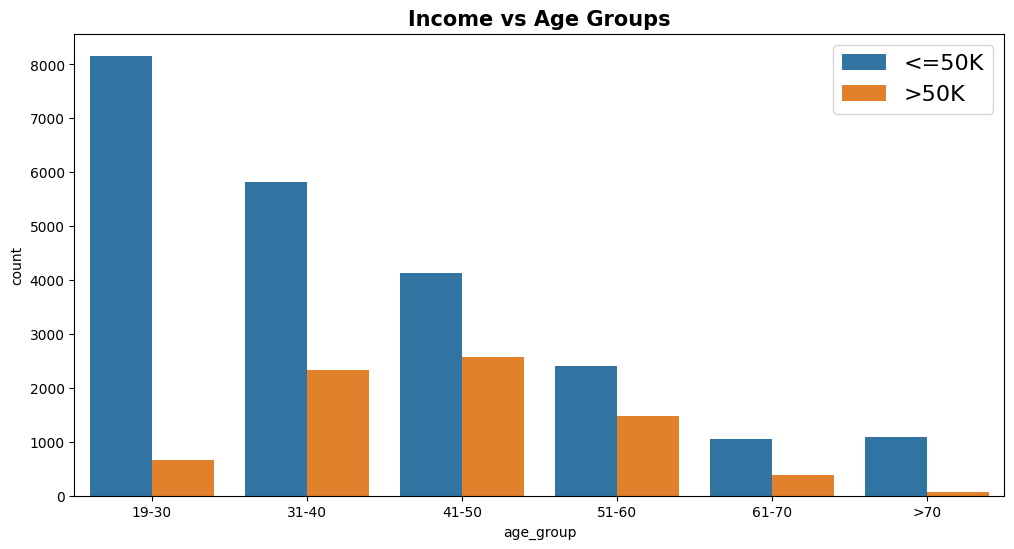

In [ ]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', '>70']
sns.countplot(x=df['age_group'], order=order_list, hue = df['income'])
plt.title('Income vs Age Groups', fontsize=15, fontweight='bold')
plt.legend(fontsize=16)

middle age groups have highest percentage of income >50k

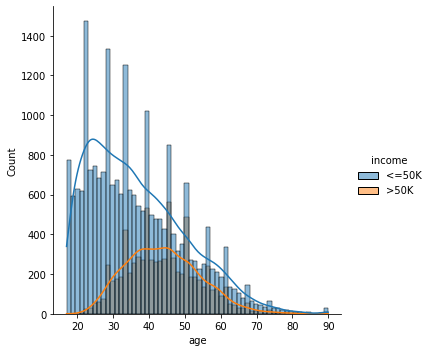

In [ ]:
#for col in ['age','fnlwgt','education_num','capital_gain','capital_loss','hoursperweek']:
sns.displot(df, x='age', hue='income', kde=True)

older richer, young people have no money

<Figure size 1440x1440 with 0 Axes>

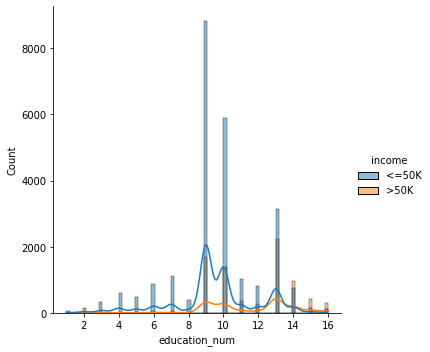

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(df, x='education_num', hue='income',  kde=True)

similar distribution but most >50k have education num >8

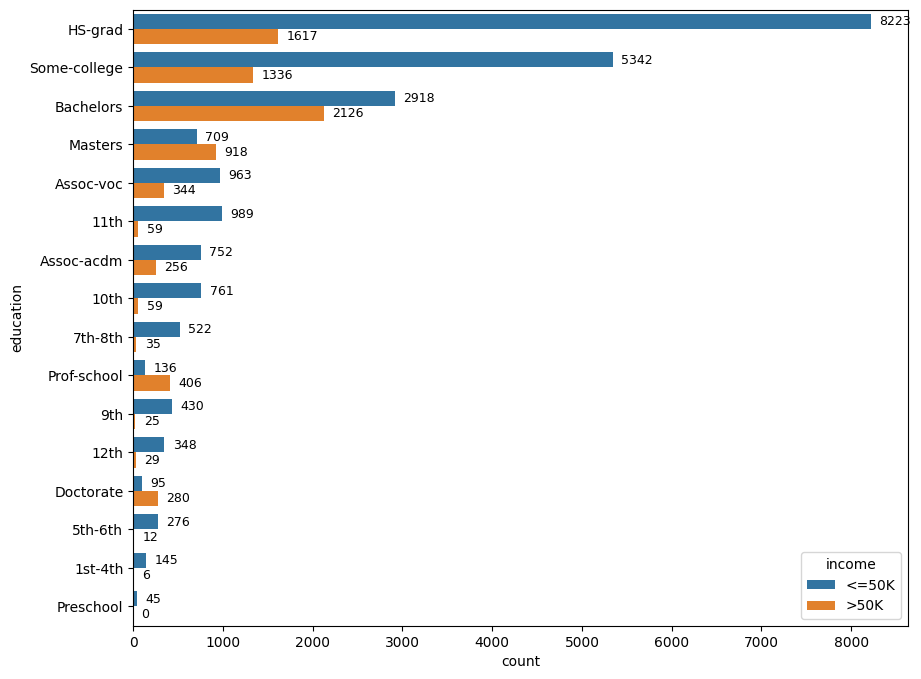

In [ ]:
plt.figure(figsize=(10,8))
p=sns.countplot(y=df['education'], order=df['education'].value_counts().index,hue=df['income'], data=df)
for container in p.containers:
    p.bar_label(container,padding=6,size=9,color="black",rotation=0)
   
plt.show()

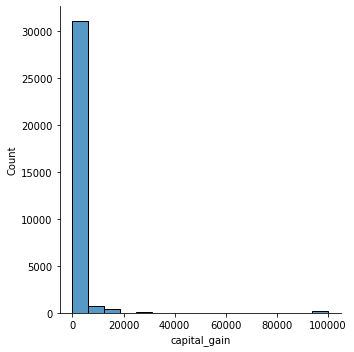

In [ ]:
sns.displot(df,x = 'capital_gain')

Text(0.5, 1.0, 'Low income Capital Gain')

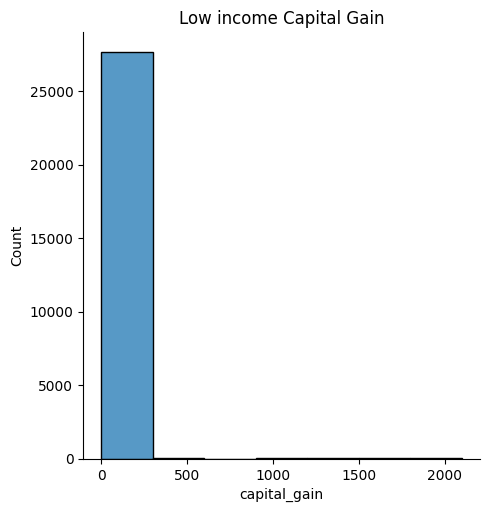

In [ ]:
sns.displot(df.loc[(df['capital_gain'] < 2000)],x = 'capital_gain',binwidth = 300)
plt.title("Low income Capital Gain")

so little people with capital income.

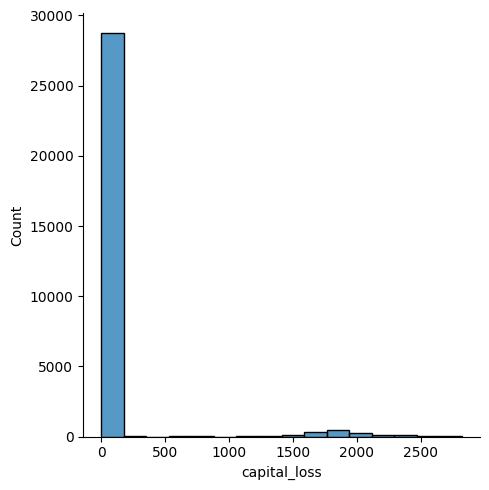

In [ ]:
sns.displot(df.loc[(df['capital_loss'] < 3000)], x = 'capital_loss') 

Majority have no capital gain/loss

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Married-civ-spouse'),
  Text(1, 0, 'Never-married'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Widowed'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

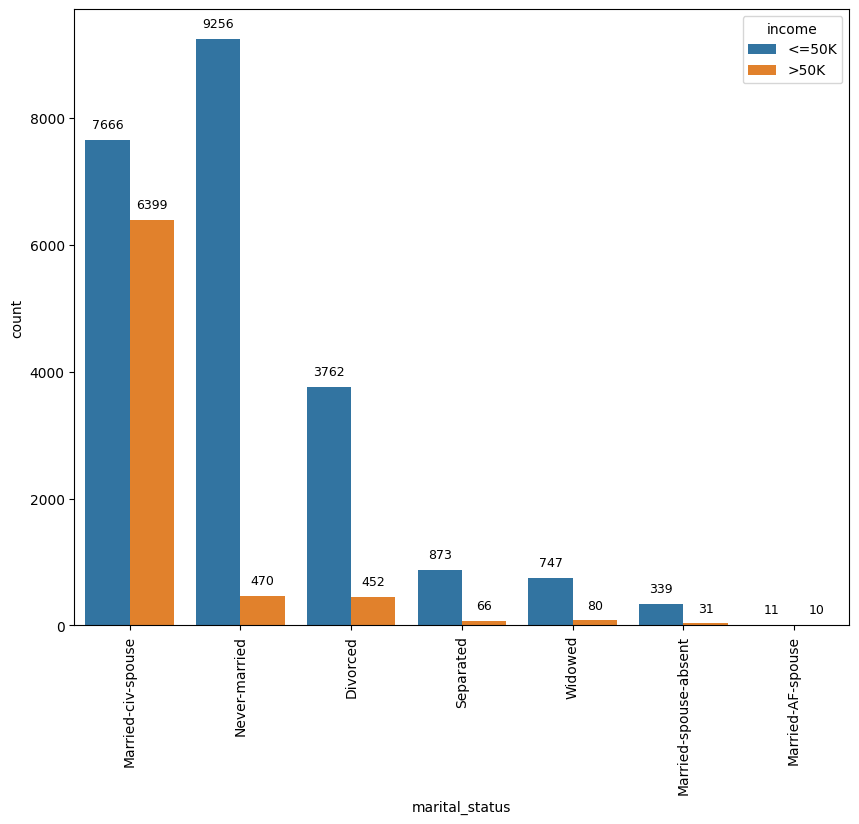

In [ ]:
plt.figure(figsize=(10,8))
p=sns.countplot(x=df['marital_status'], order=df['marital_status'].value_counts().index,hue=df['income'], data=df)
for container in p.containers:
    p.bar_label(container,padding=6,size=9,color="black",rotation=0)
   
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Husband'),
  Text(1, 0, 'Not-in-family'),
  Text(2, 0, 'Own-child'),
  Text(3, 0, 'Unmarried'),
  Text(4, 0, 'Wife'),
  Text(5, 0, 'Other-relative')])

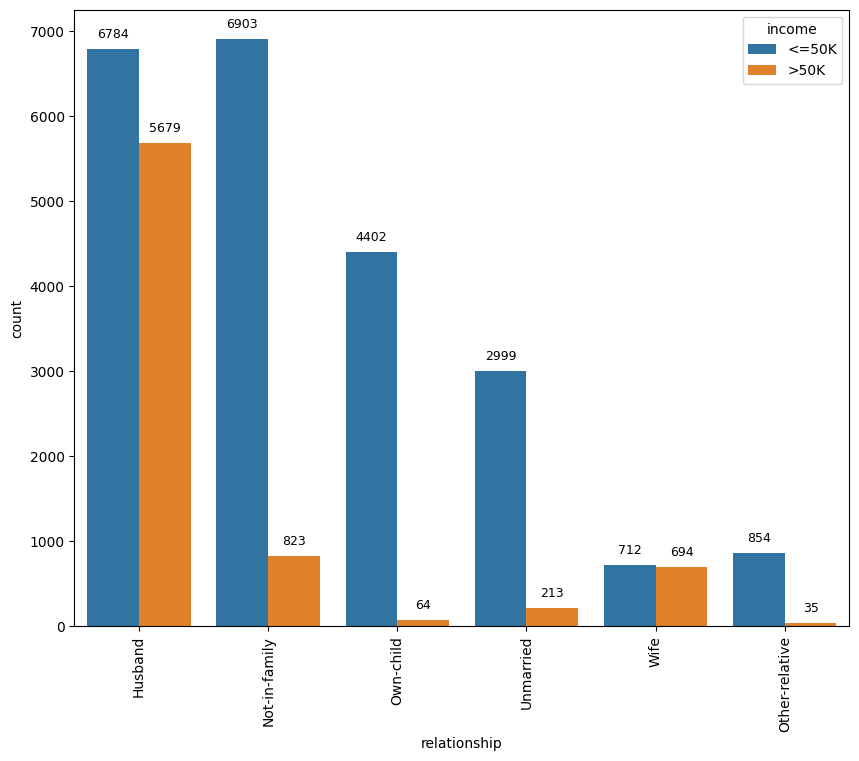

In [ ]:
plt.figure(figsize=(10,8))
p=sns.countplot(x=df['relationship'], order=df['relationship'].value_counts().index,hue=df['income'], data=df)
for container in p.containers:
    p.bar_label(container,padding=6,size=9,color="black",rotation=0)
   
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Amer-Indian-Eskimo'),
  Text(4, 0, 'Other')])

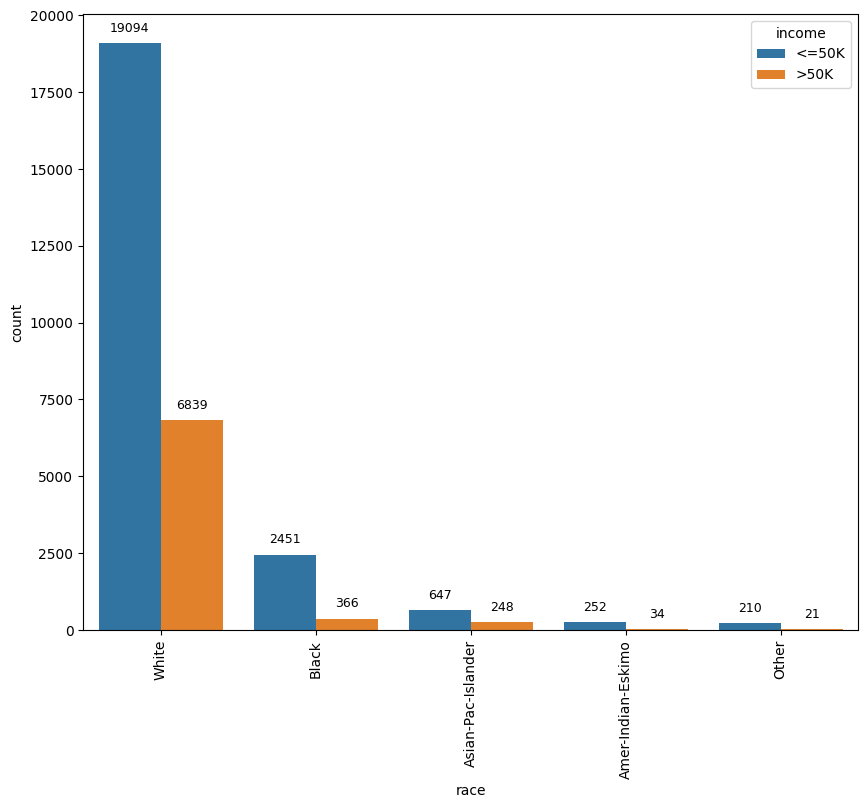

In [ ]:
plt.figure(figsize=(10,8))
p=sns.countplot(x=df['race'], order=df['race'].value_counts().index,hue=df['income'], data=df)
for container in p.containers:
    p.bar_label(container,padding=6,size=9,color="black",rotation=0)
   
plt.xticks(rotation = 90)

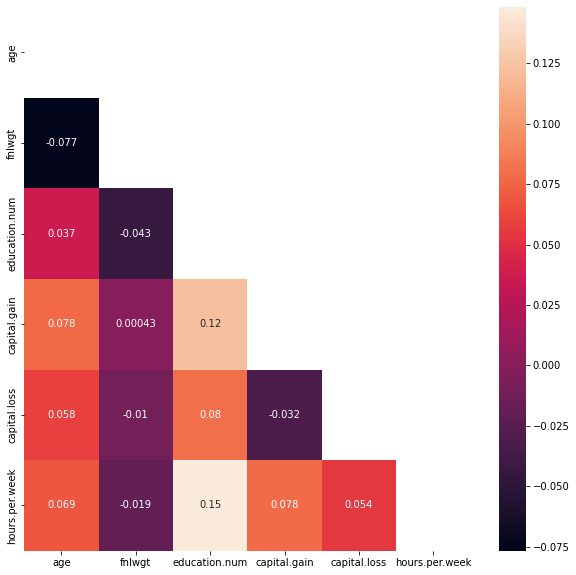

In [ ]:
plt.figure(figsize=(10,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot = True,mask=matrix)
plt.show()

In [ ]:
# gis
fig = px.choropleth(data_frame = df['native_country'].value_counts(),
                    locations=df['native_country'].value_counts().index,
                    locationmode='country names', 
                    color=df['native_country'].value_counts().values,
                    color_continuous_scale="amp")
fig.show()

# Modeling

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()

## Data Preparation

#### outliers
we wanted to first discuss outliers because we noted how capital gain and capital loss varies in the data, which are the only two variables with significant outliers. We saw that the majority didn't have any capital gain. So, if one have any capital gain, they are, in certain extend, outliers. But how does capital gain/loss exist in the first place? 
According to IRS official explanation, one has a capital gain/loss when selling the asset for more than their adjusted basis. One key information is the asset. If a person's incom is below 50k, he or she might be living paycheck to paycheck, and there is less possibility to have spared money to invest or purchase assets. So we decided to keep capital gain/loss.

## Feature selection

#### Multicollinearity
there are several variables that can be interactive but because some of them are not numerical, it can't be reflected in the correlation heatmap. 

In [ ]:
X = df.drop(['income'], axis=1)
y = df['income']

In [ ]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country','age_group']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X[feature] = le.fit_transform(X[feature])

In [ ]:
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hoursperweek,native_country,age_group
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,5
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,3
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,2
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,1
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train = pd.DataFrame(scale.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scale.transform(X_test), columns = X.columns)

## dimensionality reduction

### Why dimensionality is bad
Dimensionality can be bad for modeling because as the number of features or dimensions in the data increases, the complexity of the model also increases. This can lead to several problems, including:

- **Overfitting**: With high-dimensional data, there is a risk of overfitting, where the model fits the noise in the data rather than the underlying patterns or relationships. This can lead to poor performance on new data.
- **Curse of Dimensionality**: As the number of features increases, the **amount of data required** to accurately model the data also increases exponentially. This can make it difficult to obtain enough data to properly train the model, particularly for high-dimensional data.
- **Computational Complexity**: High-dimensional data can be computationally expensive to process, train and evaluate the model, which can be time-consuming and require substantial computing resources.
- **Interpretability**: High-dimensional models can be difficult to interpret, making it challenging to understand the underlying patterns and relationships in the data.
By reducing the dimensionality of the data, we can address some of these issues and make it easier to build **accurate, efficient, and interpretable models**. Dimensionality reduction techniques aim to preserve the most important information in the data while eliminating the less important and potentially noisy information, which can improve the model's performance and interpretability.

### PCA

Explained variance ratio in PCA refers to the **proportion of variance in the original data that is explained by each principal component**. It indicates **how much information** each principal component captures and how much of the overall variability in the data it accounts for.

The sum of all the explained variance ratios is equal to 1, which means that all the principal components combined explain **all the variance in the original data**. Therefore, a high explained variance ratio for a principal component indicates that it is an **important component** in explaining the variability in the original data, and a low explained variance ratio indicates that it is less important.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14913571, 0.1109703 , 0.09181517, 0.07323963, 0.06970125,
       0.06889723, 0.06510039, 0.06405115, 0.06096654, 0.05961069,
       0.05669293, 0.04888645, 0.04065367, 0.02634705, 0.01393186])

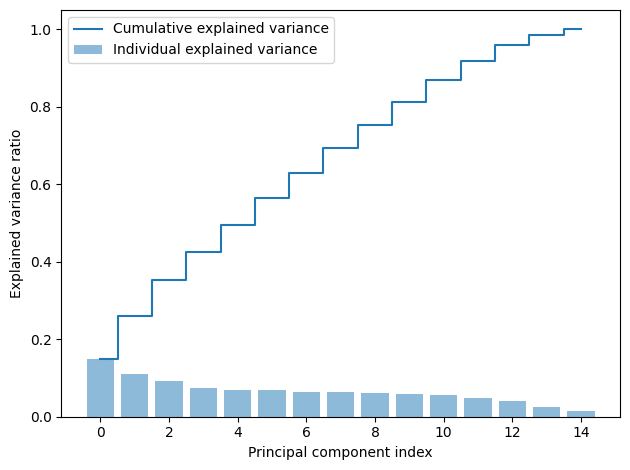

In [ ]:
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)


plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

PCA is not very helpful in this case because most variables have low influence thus there's no variable that could be considered important in explaining the variability in our data. If we only take into account relatively important ones, say the threshold is 10%, we would have only 2 variables which would only explain 26% of the whole model(by sum the influence ratio of each variable). If we set 5%, there would be 11 variables, which would explain 87% of the total variance in the original data. 

### SVD (aka LSA)

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
X_spar_train = csr_matrix(X_train)
svd = TruncatedSVD(random_state=42,n_components=5)
svd.fit(X_train)

TruncatedSVD(n_components=5, random_state=42)

In [ ]:
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

[0.14913571 0.1109703  0.09181517 0.07323963 0.06970125]
0.4948620512676377
[217.32586796 187.46663134 170.52098354 152.29781364 148.57333781]


In [53]:
from sklearn.linear_model import LogisticRegression


log = LogisticRegression()
log.fit(X_train, y_train)

log_pred = log.predict(X_test)

accuracy_score(y_test, log_pred).round(2) 

0.81

In [ ]:
cross_val_score(log, X_test, y_test, cv=10).mean().round(2)

0.82

In [ ]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hoursperweek', 'native_country',
       'age_group'],
      dtype='object')

In [ ]:
log.coef_

array([[ 0.80091102, -0.11253628,  0.0616911 ,  0.09434801,  0.85795573,
        -0.32789676, -0.00570309, -0.20163662,  0.08705256,  0.44771135,
         2.21504194,  0.27703509,  0.32700804,  0.02904044, -0.34482491]])

### Logistic regression with regularization

Kim, S. M., Kim, Y., Jeong, K., Jeong, H., & Kim, J. (2018). Logistic LASSO regression for the diagnosis of breast cancer using clinical demographic data and the BI-RADS lexicon for ultrasonography. Ultrasonography (Seoul, Korea), 37(1), 36–42. https://doi.org/10.14366/usg.16045

In [ ]:
logistic_lasso = LogisticRegression(C = 0.01, penalty='l1', solver='liblinear', random_state=42)
logistic_lasso.fit(X_train, y_train)

# l1 means lasso regression
# C is the strength of the inverse of regularization strength, smaller values specify stronger regularization.
# Here we need very strong regularization to have any variables removed. 

LogisticRegression(C=0.01, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
coefficients = logistic_lasso.coef_
features = np.arange(X_train.shape[1])
for feature, coefficient in zip(X_train.columns, coefficients[0]):
    print(f'{feature}: {coefficient:.3f}')

age: 0.426
workclass: -0.065
fnlwgt: 0.018
education: 0.032
education_num: 0.784
marital_status: -0.281
occupation: 0.000
relationship: -0.191
race: 0.047
sex: 0.382
capital_gain: 1.651
capital_loss: 0.240
hoursperweek: 0.289
native_country: 0.000
age_group: 0.000


occupation, native_country, age_group removed.

In [ ]:
logls_pred = logistic_lasso.predict(X_test)

accuracy_score(y_test, logls_pred).round(2) 

0.82

Well accuracy rate didn't really increase. Let's compare with other indicators

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred).round(2) 

0.85

The RF model with no tuning already have higher accuracy rate of 85%, let's see how random forest model think of variable importance.
Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

In [ ]:
importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

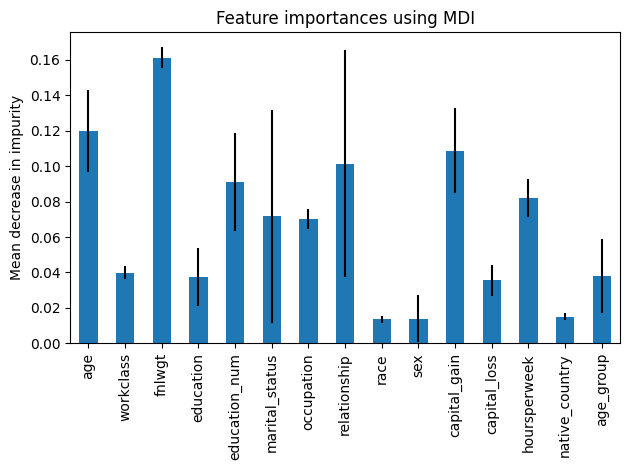

In [ ]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

'workclass', 'education', 'race', 'sex', 'native_country', 'age_group' are not considered very important. The difference is bigger than the one we applied in PCA model. 
We decided to use 'age', 'fnlwgt', 'education_num','marital_status', 'occupation', 'relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hoursperweek'

In [8]:
df_one = pd.get_dummies(df["income"])
df_two = pd.concat((df_one, df), axis=1)
df_two = df_two.drop(["income"], axis=1)
newdf = df_two.drop(["<=50K"], axis=1)

In [9]:
newdf.columns

Index(['>50K', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hoursperweek', 'native_country',
       'age_group'],
      dtype='object')

In [10]:
X = df[['age', 'fnlwgt', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hoursperweek']]
y = newdf['>50K'].values

from sklearn import preprocessing

categorical = ['occupation', 'marital_status', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X[feature] = le.fit_transform(X[feature])

In [46]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train = pd.DataFrame(scale.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scale.transform(X_test), columns = X.columns)

### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

dtscore = []


for maxd in range(2,10):
    dtc = DecisionTreeClassifier(max_depth = maxd, random_state=33)
    dtc.fit(X_train, y_train)
    dtc_pred = dtc.predict(X_test)
    score = accuracy_score(y_test, dtc_pred).round(2) 
    dtscore.append([maxd, score])

print(dtscore)

[[2, 0.82], [3, 0.83], [4, 0.84], [5, 0.85], [6, 0.85], [7, 0.85], [8, 0.85], [9, 0.85]]


We would have stable 85% accuracy after 5 depth of the tree. So we choose five for computing efficiency since there's no significant improvement to be made.

In [14]:
best_clf = DecisionTreeClassifier(max_depth =5, random_state=33)
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=33)

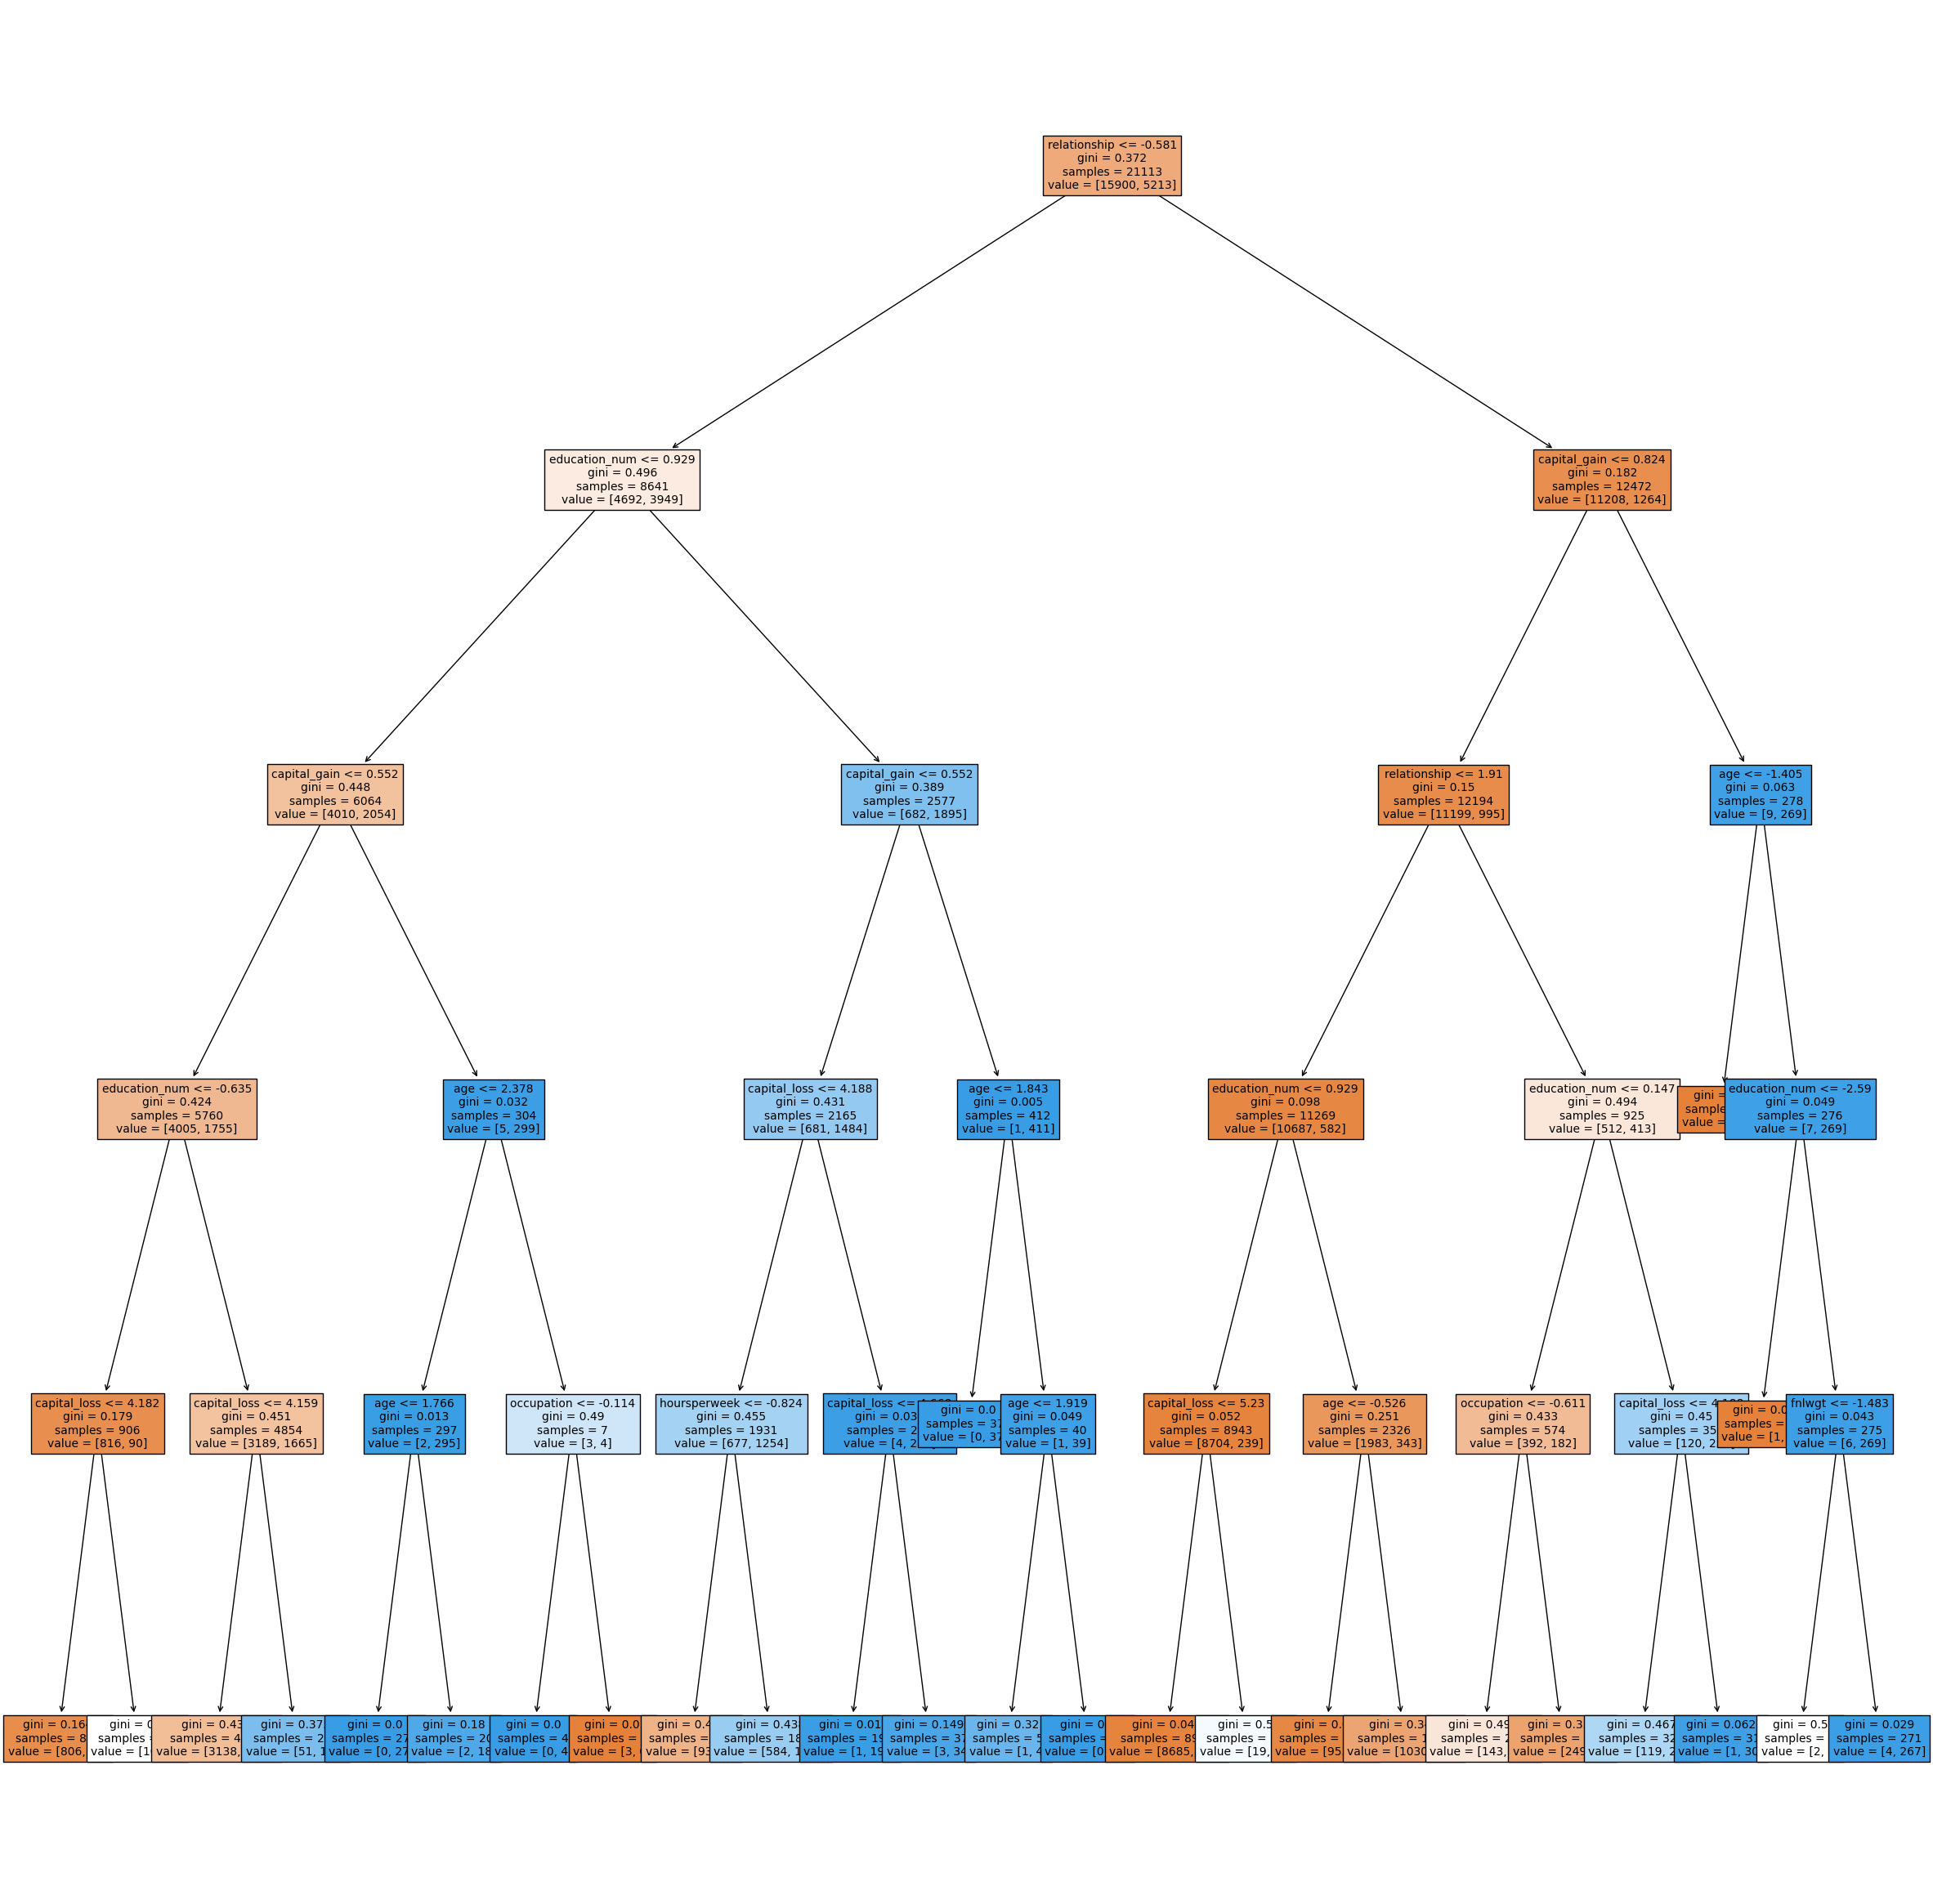

In [15]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(best_clf, 
                   feature_names=X.columns,
                   filled=True, fontsize = 10)

In [ ]:
text_representation = tree.export_text(best_clf)
print(text_representation)

|--- feature_7 <= -0.58
|   |--- feature_4 <= 0.93
|   |   |--- feature_10 <= 0.55
|   |   |   |--- feature_4 <= -0.64
|   |   |   |   |--- feature_11 <= 4.18
|   |   |   |   |   |--- class: <=50K
|   |   |   |   |--- feature_11 >  4.18
|   |   |   |   |   |--- class: <=50K
|   |   |   |--- feature_4 >  -0.64
|   |   |   |   |--- feature_11 <= 4.16
|   |   |   |   |   |--- class: <=50K
|   |   |   |   |--- feature_11 >  4.16
|   |   |   |   |   |--- class: >50K
|   |   |--- feature_10 >  0.55
|   |   |   |--- feature_0 <= 2.38
|   |   |   |   |--- feature_0 <= 1.77
|   |   |   |   |   |--- class: >50K
|   |   |   |   |--- feature_0 >  1.77
|   |   |   |   |   |--- class: >50K
|   |   |   |--- feature_0 >  2.38
|   |   |   |   |--- feature_6 <= -0.11
|   |   |   |   |   |--- class: >50K
|   |   |   |   |--- feature_6 >  -0.11
|   |   |   |   |   |--- class: <=50K
|   |--- feature_4 >  0.93
|   |   |--- feature_10 <= 0.55
|   |   |   |--- feature_11 <= 4.19
|   |   |   |   |--- feature_1

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred).round(2) 

0.85

In [ ]:
cross_val_score(rf, X_test, y_test, cv=10).mean().round(2)

0.85

### ANNs
ANNs (Artificial Neural Networks) are a class of machine learning models that can be used for both supervised and unsupervised learning. They are commonly used for feature extraction and can be used to learn complex nonlinear relationships in the input data. 

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [15]:
classifier = Sequential()

In [20]:
classifier.add(Dense(6,  activation = 'relu', input_dim = 11))

In [22]:
classifier.add(Dense(6, activation = 'relu'))

In [23]:
classifier.add(Dense(1, activation = 'sigmoid'))

#### Train ANN
compile is a method of Tensorflow. “adam’ is the optimizer 
that can perform the stochastic gradient descent. The optimizer updates the weights during training and reduces the loss. In order to understand the theory behind Gradient Descent, you can check this explanation-Stochastic Gradient Descent- A Super Easy Complete Guide!


In [24]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# binary prediction so this is the loss function to use

In [50]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
1618/1618 [==============================] - 4s 2ms/step - loss: 0.3349 - accuracy: 0.8440
Epoch 2/50
1618/1618 [==============================] - 3s 2ms/step - loss: 0.3336 - accuracy: 0.8449
Epoch 3/50
1618/1618 [==============================] - 6s 4ms/step - loss: 0.3324 - accuracy: 0.8461
Epoch 4/50
1618/1618 [==============================] - 3s 2ms/step - loss: 0.3317 - accuracy: 0.8440
Epoch 5/50
1618/1618 [==============================] - 3s 2ms/step - loss: 0.3310 - accuracy: 0.8465
Epoch 6/50
1618/1618 [==============================] - 3s 2ms/step - loss: 0.3308 - accuracy: 0.8462
Epoch 7/50
1618/1618 [==============================] - 3s 2ms/step - loss: 0.3298 - accuracy: 0.8466
Epoch 8/50
1618/1618 [==============================] - 3s 2ms/step - loss: 0.3301 - accuracy: 0.8461
Epoch 9/50
1618/1618 [==============================] - 3s 2ms/step - loss: 0.3296 - accuracy: 0.8460
Epoch 10/50
1618/1618 [==============================] - 3s 2ms/step - loss: 0.329

In [56]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred).round(2)

217/217 [==============================] - 1s 4ms/step
[[4696  374]
 [ 768 1095]]


0.84

ANNs model does work better than logistic model but not better than decisio tree model while being very consuming. So decision tree is the best.